# Introduction

Time series is a sequence or series of data points in which the time component is involved throughout the occurrence and Analyzing this time series data with certain tools and techniques is called time series analysis.


## Brief introduction of XGBoost

**XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.**



## Import Libraries

In [237]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [238]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

## Import Dataset

## Bitcoin

**Bitcoin is a digital currency which operates free of any central control or the oversight of banks or governments. Instead it relies on peer-to-peer software and cryptography. A public ledger records all bitcoin transactions and copies are held on servers around the world.**

In [239]:
bitcoindf = pd.read_csv('/content/BTC-USD (2).csv')
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-04-11,236.016006,239.537003,234.175003,236.552002,236.552002,16365200
1,2015-04-12,236.535004,237.727997,233.494995,236.153000,236.153000,12387900
2,2015-04-13,235.949997,236.934998,221.996002,224.587006,224.587006,31181800
3,2015-04-14,224.759003,224.975998,216.322998,219.158997,219.158997,31719000
4,2015-04-15,219.072998,223.832993,218.649002,223.832993,223.832993,22562000


# Preprocessing

#### Replace None or Null values with forward filling technique using *fillna* function.

In [240]:
bitcoindf.isna().mean()


date         0.0
open         0.0
high         0.0
low          0.0
close        0.0
adj_close    0.0
volume       0.0
dtype: float64

In [241]:
bitcoindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2923 non-null   object 
 1   open       2923 non-null   float64
 2   high       2923 non-null   float64
 3   low        2923 non-null   float64
 4   close      2923 non-null   float64
 5   adj_close  2923 non-null   float64
 6   volume     2923 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 160.0+ KB


In [242]:
bitcoindf = bitcoindf.fillna(method = 'ffill')

In [243]:
bitcoindf.describe()

,open,high,low,close,adj_close,volume
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2.923000e+03
mean,14105.236006,14457.688716,13718.232151,14113.818410,14113.818410,1.777117e+10
std,16220.062195,16633.682471,15745.268877,16217.172904,16217.172904,1.994753e+10
min,210.067993,223.832993,199.567001,210.494995,210.494995,1.060090e+07
25%,1216.955017,1235.750000,1204.369995,1221.715027,1221.715027,3.805590e+08
50%,8100.933594,8262.660156,7886.009766,8104.185547,8104.185547,1.319965e+10
75%,19871.503906,20328.310547,19391.642578,19932.508789,19932.508789,2.927972e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [244]:
bitcoindf.shape

(2923, 7)

In [245]:
bitcoindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2923 non-null   object 
 1   open       2923 non-null   float64
 2   high       2923 non-null   float64
 3   low        2923 non-null   float64
 4   close      2923 non-null   float64
 5   adj_close  2923 non-null   float64
 6   volume     2923 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 160.0+ KB


#### Convert Date column into Datatime format

In [246]:
bitcoindf['date']=pd.to_datetime(bitcoindf['date'])

In [247]:

bitcoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'skyblue'})

,date,open,high,low,close,adj_close,volume
0,2015-04-11 00:00:00,236.016006,239.537003,234.175003,236.552002,236.552002,16365200
1,2015-04-12 00:00:00,236.535004,237.727997,233.494995,236.153000,236.153000,12387900
2,2015-04-13 00:00:00,235.949997,236.934998,221.996002,224.587006,224.587006,31181800
3,2015-04-14 00:00:00,224.759003,224.975998,216.322998,219.158997,219.158997,31719000
4,2015-04-15 00:00:00,219.072998,223.832993,218.649002,223.832993,223.832993,22562000


# Visualization

### Plotting close price of Bitcoin

Text(0.5, 1.0, 'Bitcoin Close Price')

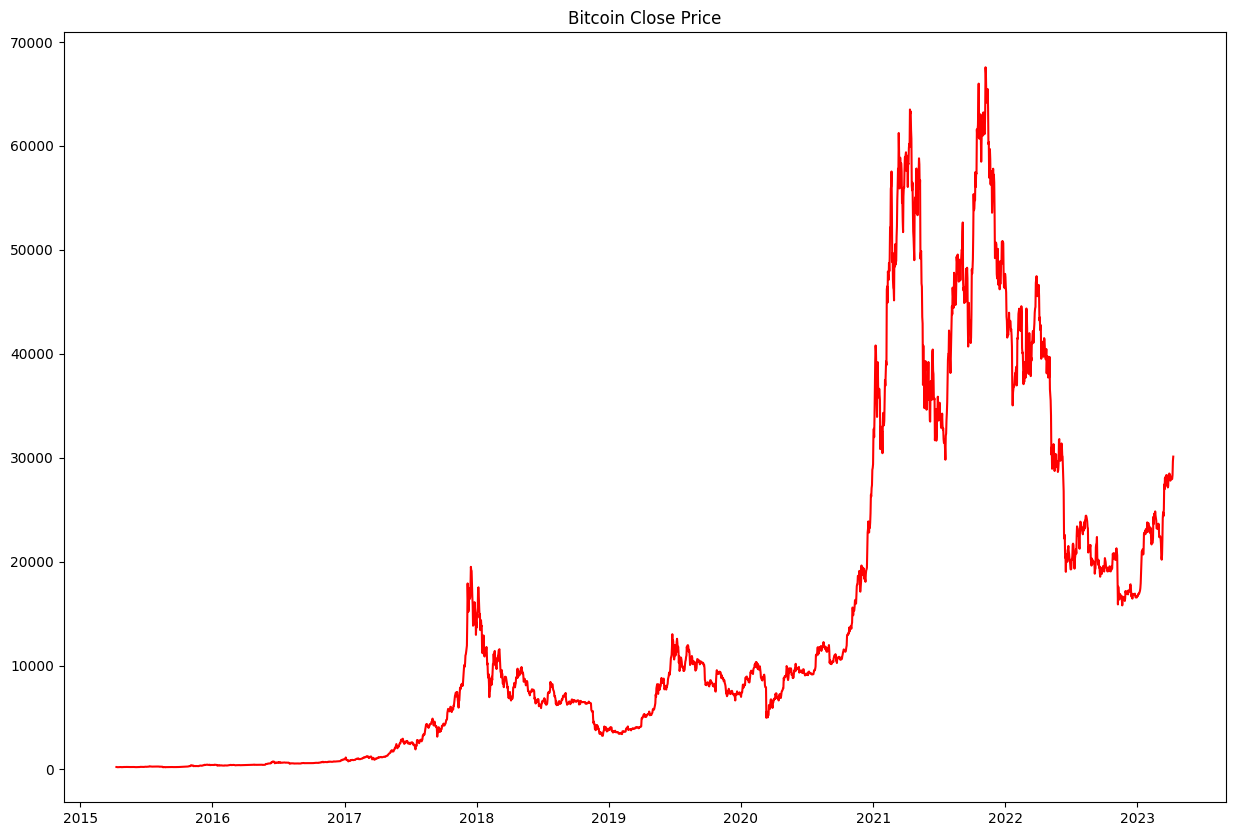

In [248]:
fig = plt.figure(figsize = (15,10))


plt.plot(bitcoindf['date'], bitcoindf['adj_close'], color="red")
plt.title('Bitcoin Close Price')


#### Plotting only 2022-2023 year close price of Bitcoin!

In [249]:
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '04-2022']

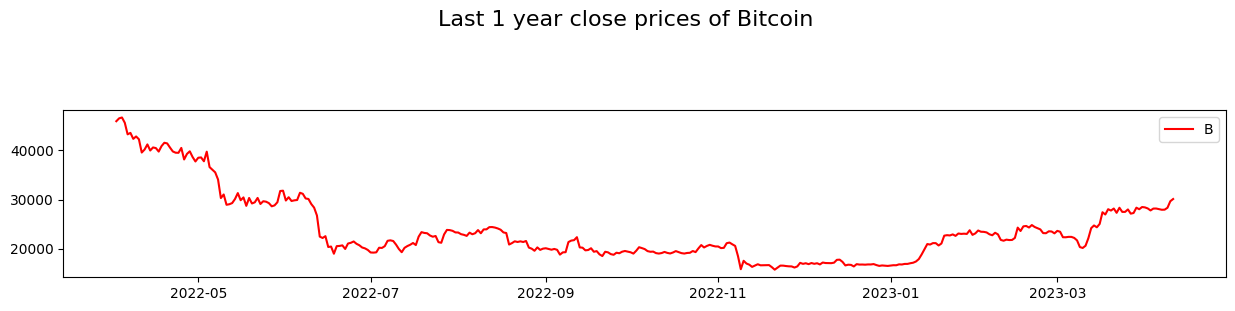

In [250]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin", fontsize=16)



plt.subplot(4, 1, 1)
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")
plt.legend("B")



#### Plotting only 2022-2023 year volume of Bitcoin

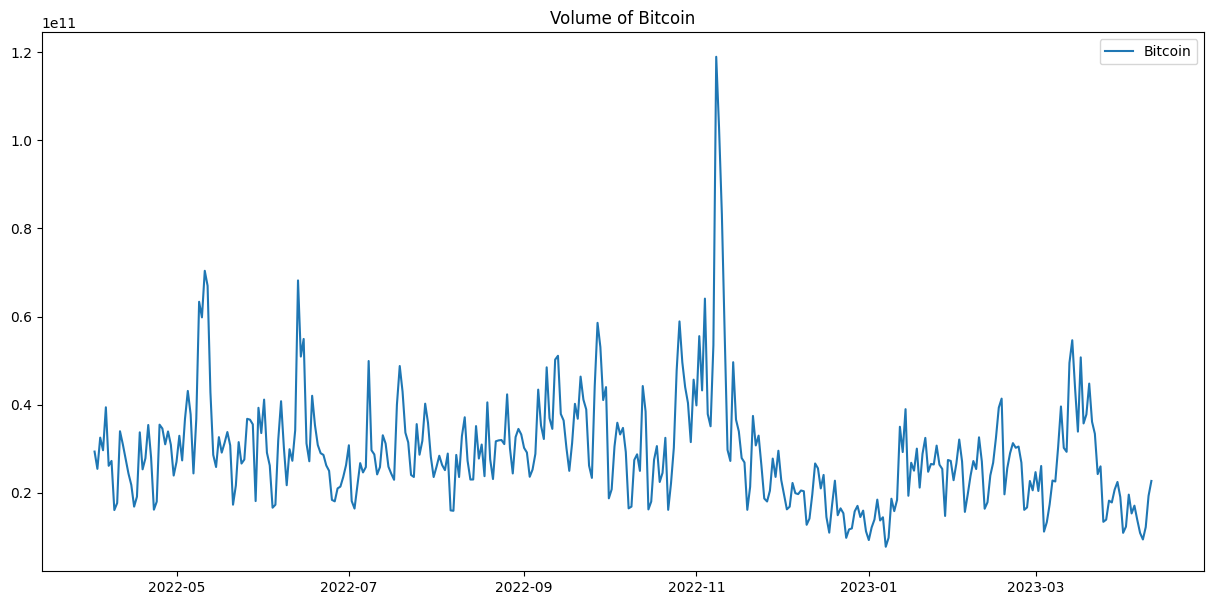

In [251]:
fig = plt.figure(figsize = (15,7))

plt.plot(last1year_bitcoindf['date'] , last1year_bitcoindf['volume'])

plt.title('Volume of Bitcoin')
plt.legend(['Bitcoin'])


plt.show()

#### Plotting last month open and close price of Bitcoin

In [252]:
last1month_bitcoindf = bitcoindf[bitcoindf['date'] > '03-2023']


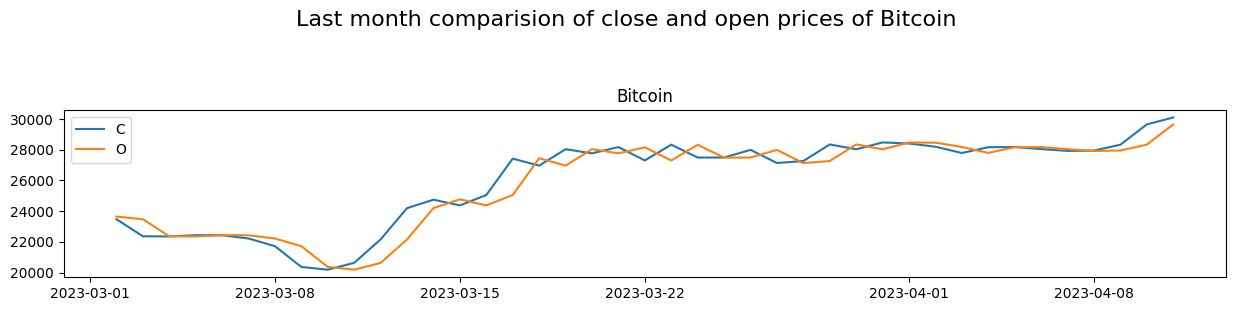

In [253]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last month comparision of close and open prices of Bitcoin", fontsize=16)
fig.tight_layout()

plt.subplot(4, 1, 1)
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['close'])
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['open'])
plt.legend(["C", "O"])
plt.title("Bitcoin")


plt.show()

### Moving Averages
 **A moving average is a commonly used statistical method for analyzing time series data.**
 
**As we know the stock prices are highly volatile and prices change quickly with time. To observe any trend or pattern we can take the help of a 50-day 200-day average.**

Text(0.5, 1.0, 'Bitcoin Close Price moving average')

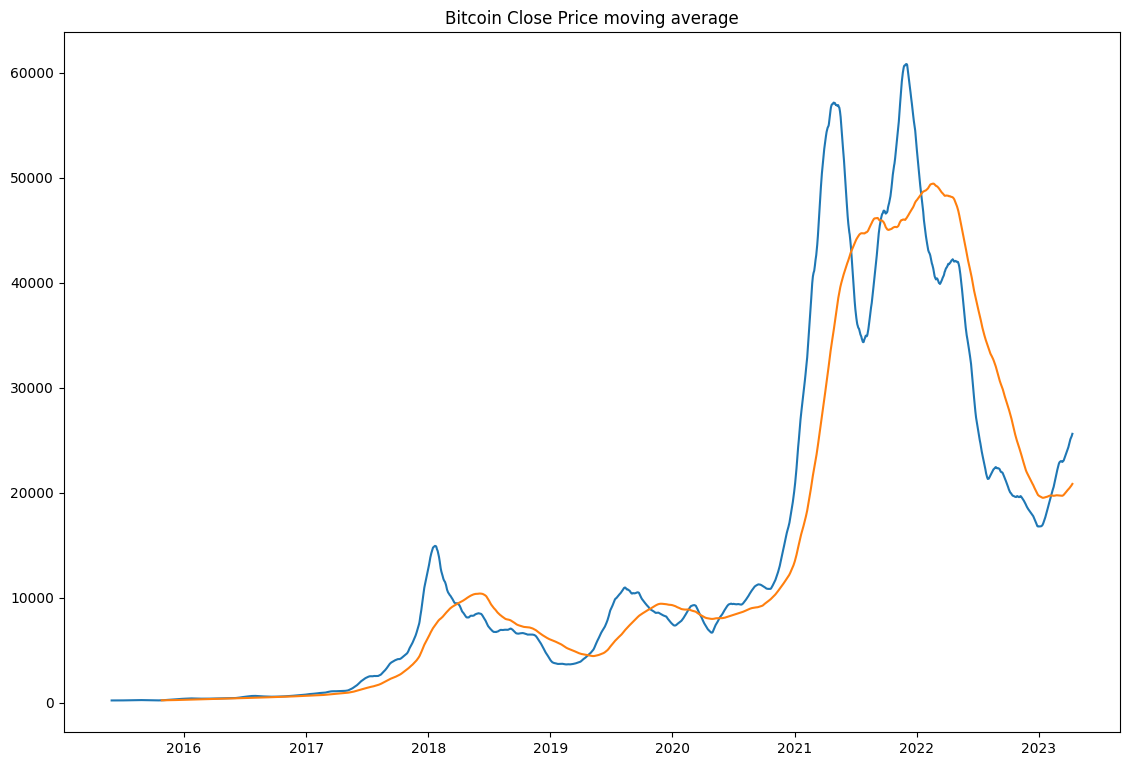

In [254]:
fig = plt.figure(figsize = (30,20))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(50).mean())
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(200).mean())
plt.title('Bitcoin Close Price moving average')


### Plotting histogram with mean indicator of bitcoinclose price


Text(50000, 400, 'Bitcoin Close Price')

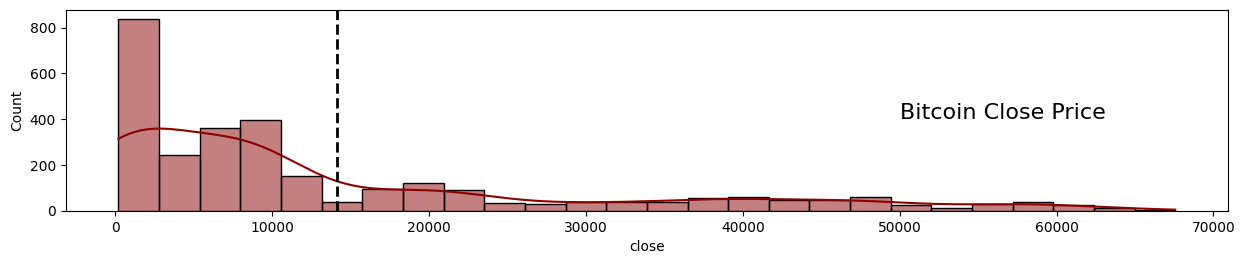

In [255]:
fig = plt.figure(figsize = (15,12))

fig.tight_layout()

plt.subplot(4, 1, 1)
sns.histplot(bitcoindf['close'],color='darkred', kde=True)
plt.axvline(bitcoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(50000,400,'Bitcoin Close Price', fontsize=16)




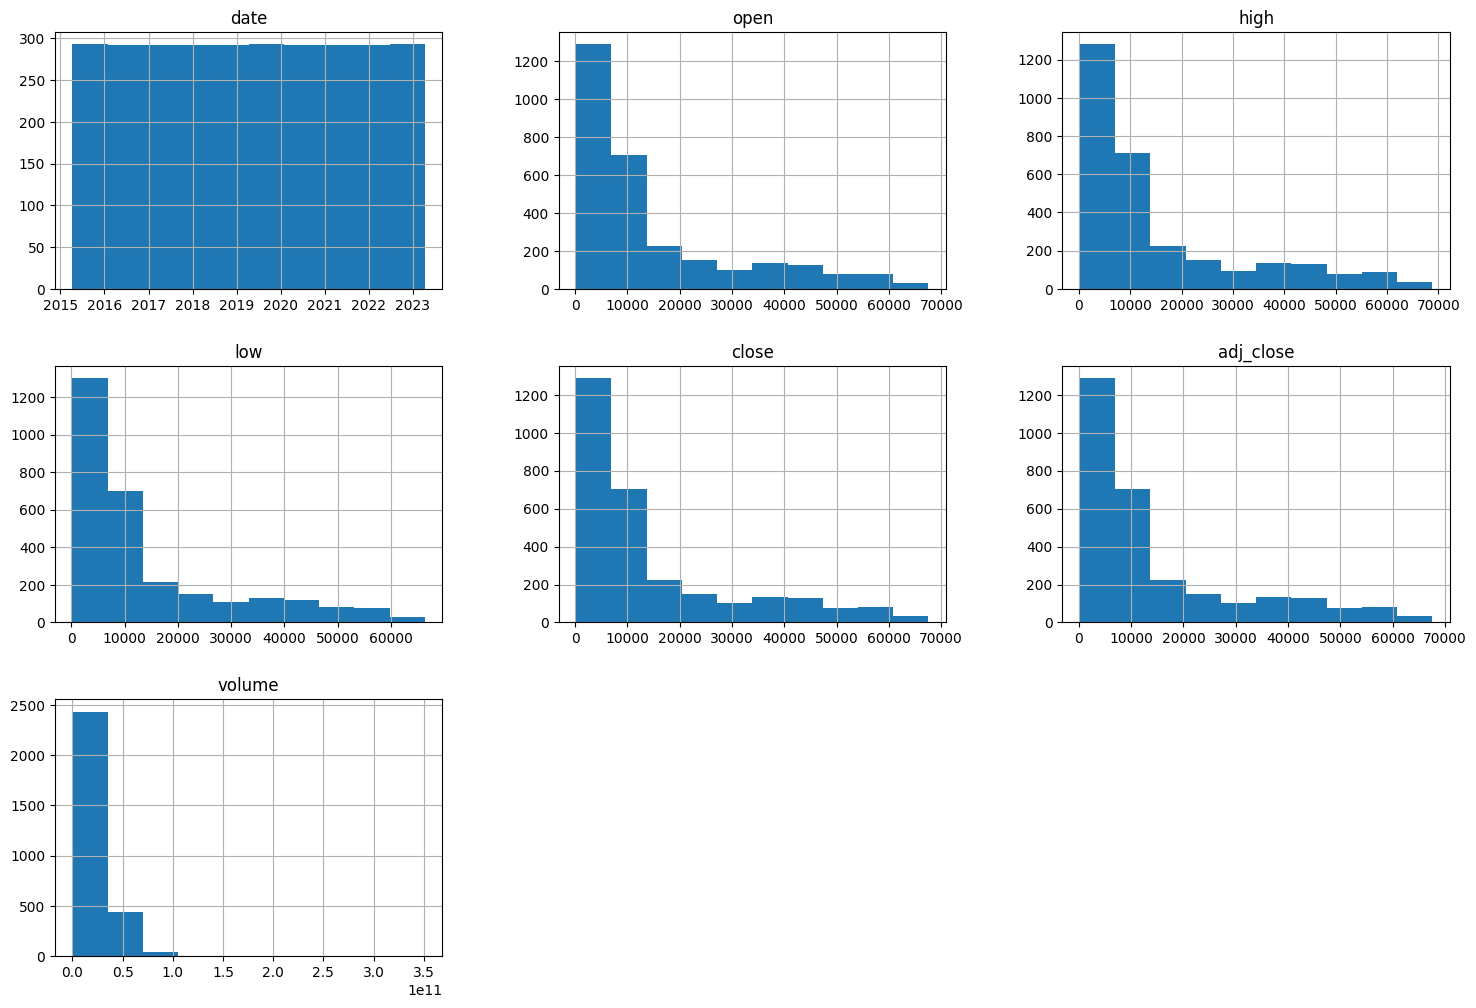

In [256]:
bitcoin_numeric = bitcoindf.select_dtypes(exclude = ["bool"])
bitcoin_numeric.hist(figsize=(18,12))
plt.show()

#  Bitcoin Close Price Prediction using XGBoost

#### Dataframe of bitcoin close price

In [257]:
closedf = bitcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2923, 2)


In [258]:
closedf = closedf[closedf['date'] > '2022-04-11']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


#### Normalizing close price value

In [259]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(365, 1)


#### Separate data for Train and Test

In [260]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


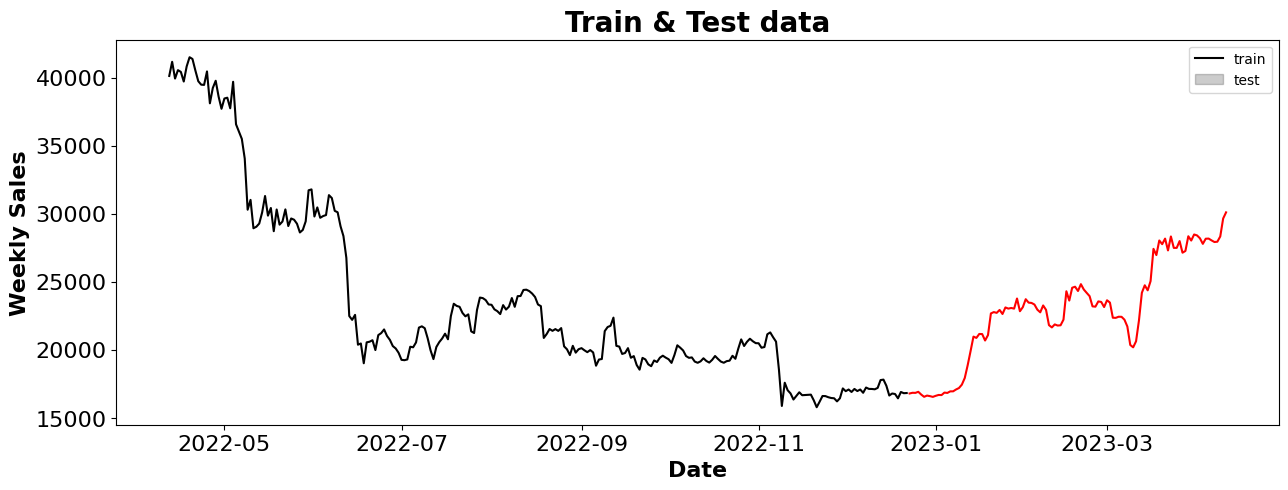

In [261]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = close_stock['date'][:255], y = close_stock['close'][:255], color = 'black')
sns.lineplot(x = close_stock['date'][255:], y = close_stock['close'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

#### Prepare train data for time series analysis

In [262]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [263]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


#### Import XGBRegressor module and Fit X_train and y_train for training model

In [264]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Model testing and evaluation

In [265]:
predictions = my_model.predict(X_train)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_train, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_train, predictions))))


Mean Absolute Error - MAE : 0.0005803126821791292
Root Mean squared Error - RMSE : 0.0008486726117373761


In [267]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)


Train data prediction: (239, 1)
Test data prediction: (94, 1)


In [268]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [269]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


#### Prediction next 10 days

In [270]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [271]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [272]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [273]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## **Applying ARIMA Model**

In [310]:
# Init the best SARIMAX model
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(y_train,exog=X_train,order=(1,1,1))

In [311]:
# training the model

results = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [312]:
X_train.shape

(239, 15)

In [313]:
# get predictions
predictions1 = results.predict(start =training_size, end=training_size+test_size+112,exog=X_train)
predictions1


array([0.19516179, 0.16552152, 0.17906084, 0.1819948 , 0.20038836,
       0.15194294, 0.18983933, 0.15652683, 0.15235994, 0.15326174,
       0.16620588, 0.16030273, 0.15504744, 0.15987921, 0.14677102,
       0.15894872, 0.13820229, 0.15334028, 0.15370785, 0.16734016,
       0.16398645, 0.16706544, 0.15840769, 0.14254324, 0.15150978,
       0.14983777, 0.16869511, 0.17178765, 0.15507138, 0.16367808,
       0.15119072, 0.13565696, 0.12713167, 0.13034923, 0.10239361,
       0.1079693 , 0.10446048, 0.10552421, 0.09792627, 0.10025693,
       0.0907032 , 0.09083052, 0.10262134, 0.07682565, 0.0856007 ,
       0.08708508, 0.08808917, 0.06797338, 0.08135593, 0.0582627 ,
       0.07988673, 0.06053925, 0.06884753, 0.06528525, 0.07741405,
       0.07128262, 0.07725949, 0.07962207, 0.08046779, 0.0782826 ,
       0.07313073, 0.06891719, 0.06050152, 0.06482742, 0.07625059,
       0.07997969, 0.07984892, 0.08162014, 0.08416218, 0.08376645,
       0.09299207, 0.09077635, 0.08639861, 0.08517713, 0.07981

In [314]:
y_train

array([0.9120518 , 0.93276723, 0.88750249, 0.85270051, 0.88202989,
       0.88437223, 0.85408404, 0.92983293, 0.80837954, 0.78760532,
       0.76664639, 0.71054445, 0.56423901, 0.59246922, 0.51132931,
       0.51566119, 0.52481333, 0.55662929, 0.60344344, 0.54736064,
       0.56925172, 0.50292643, 0.5649149 , 0.52161046, 0.5306123 ,
       0.56528   , 0.51765059, 0.5392981 , 0.53567286, 0.52419585,
       0.4993217 , 0.50660627, 0.53114623, 0.61982569, 0.62238913,
       0.54487817, 0.57087063, 0.54119597, 0.54619387, 0.54906172,
       0.60599282, 0.59762458, 0.56102703, 0.55704664, 0.51706318,
       0.48894803, 0.42680013, 0.26054766, 0.24963611, 0.26387061,
       0.1786616 , 0.18215491, 0.12561928, 0.18533545, 0.18713458,
       0.1914534 , 0.16331593, 0.20604693, 0.21171586, 0.22224189,
       0.20376884, 0.19242095, 0.17473339, 0.16786549, 0.15544896,
       0.13540812, 0.13435384, 0.13648565, 0.17281342, 0.17121335,
       0.18514002, 0.22750137, 0.23113845, 0.22573664, 0.19728